In [4]:
from importlib import reload
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import joblib

%matplotlib inline

In [237]:
img = cv2.imread('test_images/test3.jpg')
#img = cv2.imread('../CarND-Advanced-Lane-Lines/video_images/challenge_video_4.jpg')

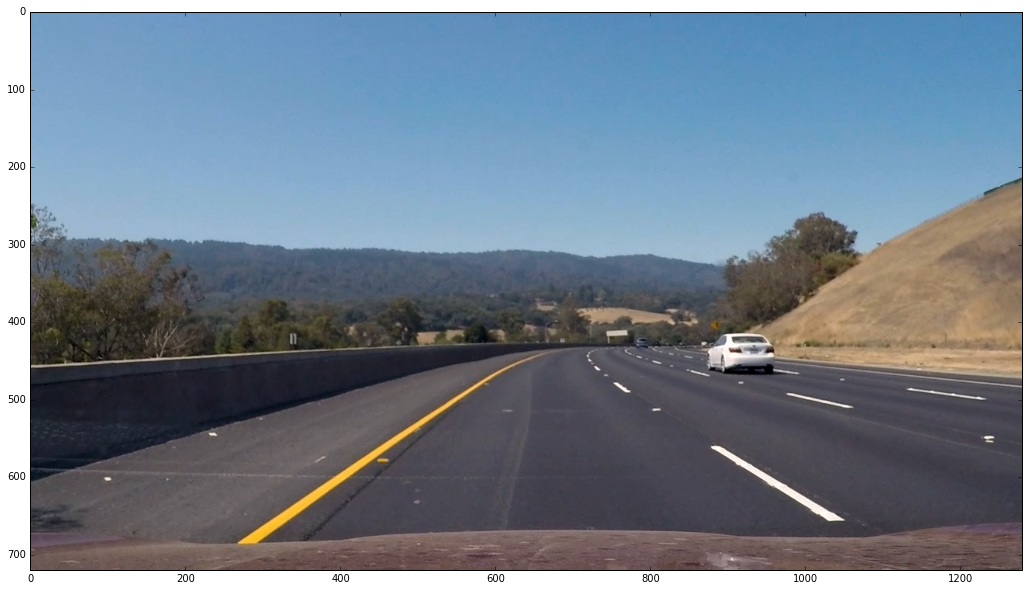

In [238]:
plt.figure(figsize=(20,10))
plt.imshow(img[:,:,::-1])

In [212]:
model_fname = 'model_fullset'
scaler, clf = joblib.load(model_fname + '_scaler.pickle'), joblib.load(model_fname + '_svc.pickle')

In [214]:
reload(utils)

<module 'utils' from '/home/huangsx/data/sdc/CarND-Vehicle-Detection/utils.py'>

In [254]:
%%time

scales = [20, 30, 40, 50, 60]
imgs = [cv2.resize(img, (16*s, 9*s)) for s in scales]
boxes = []
for scaled_img in imgs:
    boxes += utils.detect_vehicles_single_scale(scaled_img, scaler, clf, 1280/scaled_img.shape[1])


CPU times: user 25.6 s, sys: 2.79 ms, total: 25.6 s
Wall time: 25 s


(720, 1280)


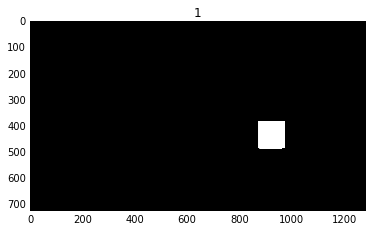

In [257]:
heatmap, lbls = utils.get_labels((720,1280), [x for x in boxes if x[0]>360], 1)
plt.imshow(heatmap*(250//lbls), cmap='gray')
plt.title(str(lbls))